In [18]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 572 kB 4.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from math import sqrt
import shap

ModuleNotFoundError: No module named 'shap'

In [ ]:
iphone12_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iPhone12_Final.csv', parse_dates=['weeks_monday','month_year'])

In [ ]:
iphone12_df.head(15)

In [ ]:
iphone12_frame = iphone12_df[(iphone12_df['days_since_release_date'] >= 318) & (iphone12_df['days_since_release_date'] <= 402)]
iphone12_frame 

In [ ]:
iphone13_df = pd.read_csv('/data/p_dsi/teams2023/team2/asurion_data/iPhone13_Final.csv', parse_dates=['weeks_monday','month_year'])

In [33]:
iphone13_df.tail(30)

,days_since_release_date,weeks_monday,month,year,month_year,holiday,this_week,avg_claim_this_month,avg_claim_last_month,1_week_ago,2_week_ago,3_week_ago,4_week_ago
32,274,2022-07-25,7,2022,2022-07-01,0,507,470.50,381.25,509.0,434.0,432.0,422.0
33,281,2022-08-01,8,2022,2022-08-01,0,561,631.20,470.50,507.0,509.0,434.0,432.0
34,288,2022-08-08,8,2022,2022-08-01,0,675,631.20,470.50,561.0,507.0,509.0,434.0
35,295,2022-08-15,8,2022,2022-08-01,0,648,631.20,470.50,675.0,561.0,507.0,509.0
36,302,2022-08-22,8,2022,2022-08-01,0,592,631.20,470.50,648.0,675.0,561.0,507.0
37,309,2022-08-29,8,2022,2022-08-01,0,680,631.20,470.50,592.0,648.0,675.0,561.0
38,316,2022-09-05,9,2022,2022-09-01,0,688,631.00,631.20,680.0,592.0,648.0,675.0
39,323,2022-09-12,9,2022,2022-09-01,0,640,631.00,631.20,688.0,680.0,592.0,648.0
40,330,2022-09-19,9,2022,2022-09-01,0,596,631.00,631.20,640.0,688.0,680.0,592.0
41,337,2022-09-26,9,2022,2022-09-01,0,600,631.00,631.20,596.0,640.0,688.0,680.0


In [36]:
iphone13_frame = iphone13_df[(iphone13_df['days_since_release_date'] >= 316) & (iphone13_df['days_since_release_date'] <= 400)]
iphone13_frame = iphone13_frame.reset_index(drop=True)
iphone13_frame 

,days_since_release_date,weeks_monday,month,year,month_year,holiday,this_week,avg_claim_this_month,avg_claim_last_month,1_week_ago,2_week_ago,3_week_ago,4_week_ago
0,316,2022-09-05,9,2022,2022-09-01,0,688,631.00,631.2,680.0,592.0,648.0,675.0
1,323,2022-09-12,9,2022,2022-09-01,0,640,631.00,631.2,688.0,680.0,592.0,648.0
2,330,2022-09-19,9,2022,2022-09-01,0,596,631.00,631.2,640.0,688.0,680.0,592.0
3,337,2022-09-26,9,2022,2022-09-01,0,600,631.00,631.2,596.0,640.0,688.0,680.0
4,344,2022-10-03,10,2022,2022-10-01,0,655,745.00,631.0,600.0,596.0,640.0,688.0
5,351,2022-10-10,10,2022,2022-10-01,0,780,745.00,631.0,655.0,600.0,596.0,640.0
6,358,2022-10-17,10,2022,2022-10-01,0,709,745.00,631.0,780.0,655.0,600.0,596.0
7,365,2022-10-24,10,2022,2022-10-01,0,803,745.00,631.0,709.0,780.0,655.0,600.0
8,372,2022-10-31,10,2022,2022-10-01,0,778,745.00,631.0,803.0,709.0,780.0,655.0
9,379,2022-11-07,11,2022,2022-11-01,0,741,752.75,745.0,778.0,803.0,709.0,780.0


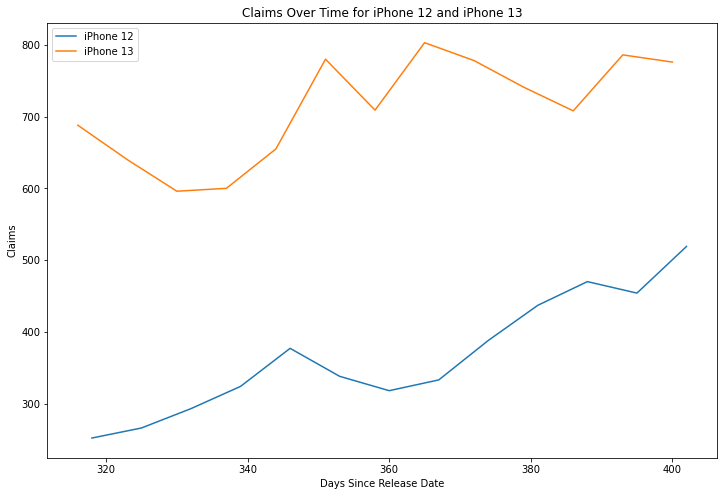

In [37]:
plt.plot(iphone12_frame['days_since_release_date'], iphone12_frame['this_week'], label='iPhone 12')

plt.plot(iphone13_frame['days_since_release_date'], iphone13_frame['this_week'], label='iPhone 13')

plt.xlabel('Days Since Release Date')
plt.ylabel('Claims')
plt.title('Claims Over Time for iPhone 12 and iPhone 13')
plt.legend()
plt.show()

In [39]:
diff = iphone13_frame['this_week'] - iphone12_frame['this_week']

mean_diff = diff.mean()

print("Average difference between iPhone 13 and iPhone 12 claims:", mean_diff)

Average difference between iPhone 13 and iPhone 12 claims: 345.46153846153845


In [40]:
x1, x2, x3, x4, x5, x6, x7, y_train = iphone12_frame['1_week_ago'], iphone12_frame['2_week_ago'], iphone12_frame['3_week_ago'], iphone12_frame['4_week_ago'], iphone12_frame['days_since_release_date'], iphone12_frame['holiday'], iphone12_frame['avg_claim_last_month'], iphone12_frame['this_week']
x1, x2, x3, x4, x5, x6, x7, y_train = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5), np.array(x6), np.array(x7), np.array(y_train)
x1, x2, x3, x4, x5, x6, x7, y_train = x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), x4.reshape(-1, 1), x5.reshape(-1, 1), x6.reshape(-1, 1), x7.reshape(-1, 1), y_train.reshape(-1, 1)
X_train = np.concatenate((x1, x2, x3, x4, x5, x6, x7), axis = 1)

x1, x2, x3, x4, x5, x6, x7, y_test = iphone13_frame['1_week_ago'], iphone13_frame['2_week_ago'], iphone13_frame['3_week_ago'], iphone13_frame['4_week_ago'], iphone13_frame['days_since_release_date'], iphone13_frame['holiday'], iphone13_frame['avg_claim_last_month'], iphone13_frame['this_week']
x1, x2, x3, x4, x5, x6, x7, y_test = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5), np.array(x6), np.array(x7), np.array(y_test)
x1, x2, x3, x4, x5, x6, x7, y_test = x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), x4.reshape(-1, 1), x5.reshape(-1, 1), x6.reshape(-1, 1), x7.reshape(-1, 1), y_test.reshape(-1, 1)
X_test = np.concatenate((x1, x2, x3, x4, x5, x6, x7), axis = 1)

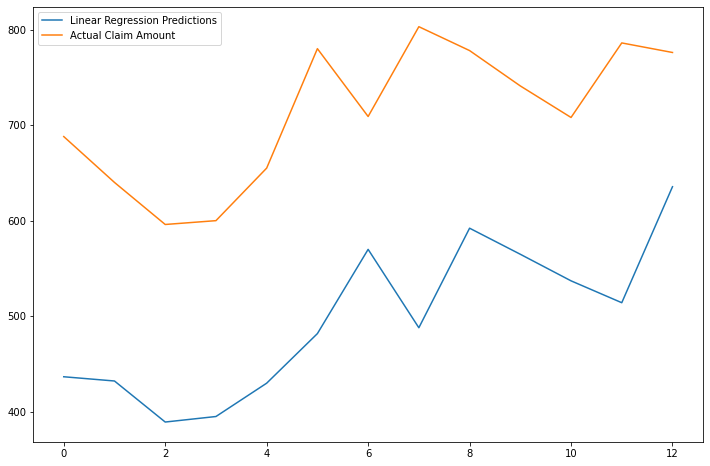

Mean sqaured error for Linear Regression model is:  221.49288348342782


In [41]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred, label = "Linear Regression Predictions")
plt.plot(y_test, label = "Actual Claim Amount")
plt.legend(loc="upper left")
plt.show()
rmse_lr = sqrt(mean_squared_error(lin_pred, y_test))
print("Mean sqaured error for Linear Regression model is: ", rmse_lr)

In [46]:
prediction_diff = y_test - lin_pred
print(np.mean(prediction_diff))

214.89517043569654


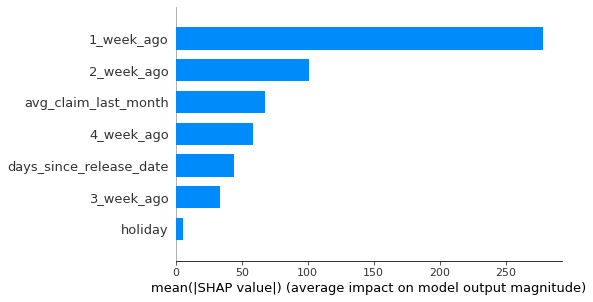

In [42]:
explainer = shap.LinearExplainer(lin_model, X_train)
shap_values = explainer.shap_values(X_test)
X_test_df = pd.DataFrame(X_test, columns=['1_week_ago', '2_week_ago', '3_week_ago', '4_week_ago', 'days_since_release_date', 'holiday', 'avg_claim_last_month'])
shap.summary_plot(shap_values, X_test_df, plot_type="bar")

In [48]:
lin_pred

array([[436.63715936],
       [432.20613507],
       [389.25554334],
       [395.03515685],
       [429.91437427],
       [481.80314432],
       [569.95097361],
       [487.93421798],
       [592.11869805],
       [564.8349216 ],
       [537.0244907 ],
       [514.13097771],
       [635.51699147]])

In [51]:
x1 = lin_pred[-1]
x2 = lin_pred[-2]
x3 = lin_pred[-3]
x4 = lin_pred[-4]
x5 = 407
x6 = 0
x7 = 752.75
x1, x2, x3, x4, x5, x6, x7 = np.array(x1), np.array(x2), np.array(x3), np.array(x4), np.array(x5), np.array(x6), np.array(x7)
x1, x2, x3, x4, x5, x6, x7 = x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), x4.reshape(-1, 1), x5.reshape(-1, 1), x6.reshape(-1, 1), x7.reshape(-1, 1)
X_next = np.concatenate((x1, x2, x3, x4, x5, x6, x7), axis = 1)
X_next

array([[635.51699147, 514.13097771, 537.0244907 , 564.8349216 ,
        407.        ,   0.        , 752.75      ]])

In [53]:
next_pred = lin_model.predict(X_next)
next_pred

array([[571.36506705]])

### Now if we add the average prediction difference (from the test set vs prediction earlier) 214.9, our prediction for the next week would be 571 + 215 = 